## Migration Prediction Model using SARIMA

#### Our model is taking previous year statistics to predict a graph that will show  statistics about migration going to happen in next 20 years by taking Destination and Gender as input  

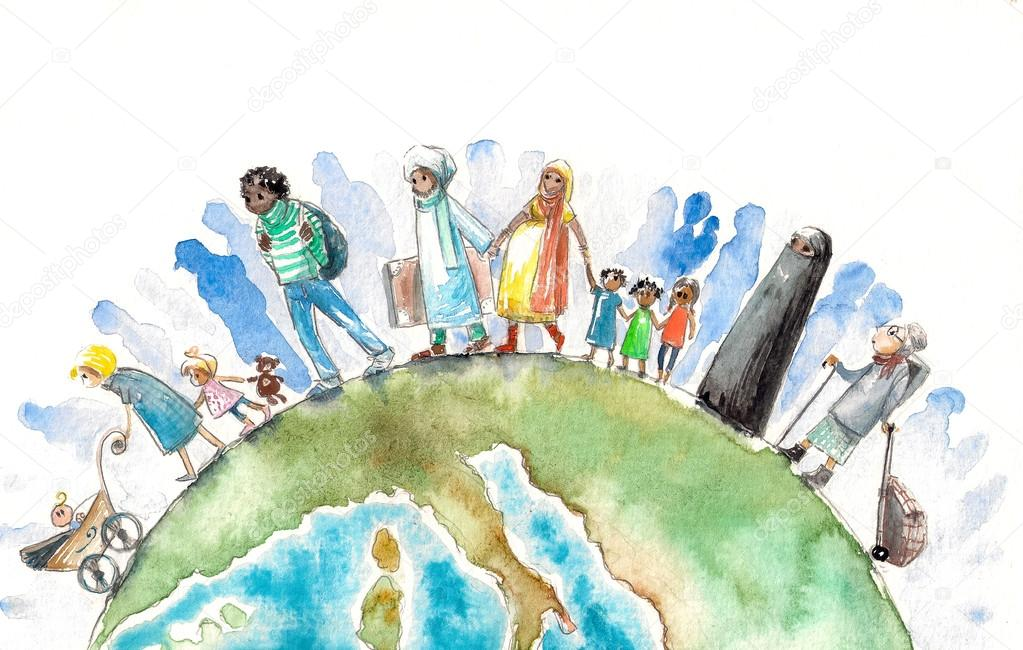

In [17]:
import pandas as pd
import numpy as np

In [18]:
data = pd.read_csv("IndianMigrationHistory.csv")

In [19]:
data

Country Origin Name Country Origin Code Migration by Gender Name  \
0                 India                 IND                   Female   
1                 India                 IND                   Female   
2                 India                 IND                   Female   
3                 India                 IND                   Female   
4                 India                 IND                   Female   
..                  ...                 ...                      ...   
457               India                 IND                     Male   
458               India                 IND                     Male   
459               India                 IND                     Male   
460               India                 IND                     Male   
461               India                 IND                     Male   

    Migration by Gender Code   Country Dest Name Country Dest Code  \
0                        FEM         Afghanistan               AFG   
1                        FEM             Albania               ALB   
2                        FEM             Algeria               DZA   
3                        FEM      American Samoa               ASM   
4                        FEM             Andorra               AND   
..                       ...                 ...               ...   
457                      MAL   Wallis and Futuna               WLF   
458                      MAL  West Bank and Gaza               PSE   
459                      MAL         Yemen, Rep.               YEM   
460                      MAL              Zambia               ZMB   
461                      MAL            Zimbabwe               ZWE   

    1960 [1960] 1970 [1970] 1980 [1980] 1990 [1990] 2000 [2000]  
0          9521       11578        2872        2234        4445  
1             1           2           2           2           2  
2             6           2           2           1           0  
3             0           0           2           3           4  
4             2          13           3           6           8  
..          ...         ...         ...         ...         ...  
457           0           0           0           0           2  
458          74          89         105         138         213  
459        3171        3926        4860        6017        7034  
460        4697        3746        3599        2695        2414  
461        1496        1405        1325        1250        1149  

[462 rows x 11 columns]

In [20]:
data = data.drop(['Country Origin Name','Country Origin Code','Migration by Gender Code'],axis = 1)

In [21]:
data

Migration by Gender Name   Country Dest Name Country Dest Code  \
0                     Female         Afghanistan               AFG   
1                     Female             Albania               ALB   
2                     Female             Algeria               DZA   
3                     Female      American Samoa               ASM   
4                     Female             Andorra               AND   
..                       ...                 ...               ...   
457                     Male   Wallis and Futuna               WLF   
458                     Male  West Bank and Gaza               PSE   
459                     Male         Yemen, Rep.               YEM   
460                     Male              Zambia               ZMB   
461                     Male            Zimbabwe               ZWE   

    1960 [1960] 1970 [1970] 1980 [1980] 1990 [1990] 2000 [2000]  
0          9521       11578        2872        2234        4445  
1             1           2           2           2           2  
2             6           2           2           1           0  
3             0           0           2           3           4  
4             2          13           3           6           8  
..          ...         ...         ...         ...         ...  
457           0           0           0           0           2  
458          74          89         105         138         213  
459        3171        3926        4860        6017        7034  
460        4697        3746        3599        2695        2414  
461        1496        1405        1325        1250        1149  

[462 rows x 8 columns]

In [22]:
data['Migration by Gender Name'].unique()

array(['Female', 'Male'], dtype=object)

In [23]:
data.head(5)

Migration by Gender Name Country Dest Name Country Dest Code 1960 [1960]  \
0                   Female       Afghanistan               AFG        9521   
1                   Female           Albania               ALB           1   
2                   Female           Algeria               DZA           6   
3                   Female    American Samoa               ASM           0   
4                   Female           Andorra               AND           2   

  1970 [1970] 1980 [1980] 1990 [1990] 2000 [2000]  
0       11578        2872        2234        4445  
1           2           2           2           2  
2           2           2           1           0  
3           0           2           3           4  
4          13           3           6           8

In [24]:
data.tail(5)

Migration by Gender Name   Country Dest Name Country Dest Code  \
457                     Male   Wallis and Futuna               WLF   
458                     Male  West Bank and Gaza               PSE   
459                     Male         Yemen, Rep.               YEM   
460                     Male              Zambia               ZMB   
461                     Male            Zimbabwe               ZWE   

    1960 [1960] 1970 [1970] 1980 [1980] 1990 [1990] 2000 [2000]  
457           0           0           0           0           2  
458          74          89         105         138         213  
459        3171        3926        4860        6017        7034  
460        4697        3746        3599        2695        2414  
461        1496        1405        1325        1250        1149

In [25]:
data['Migration by Gender Name'].unique()

array(['Female', 'Male'], dtype=object)

In [26]:
 data['Country Dest Name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
       'Faeroe Islands', 'Falkland Is

In [27]:
from ipywidgets import interact
def myfunction(x1,x2):
    import pandas as pd
    import numpy as np
    import statsmodels as sm
    from statsmodels.tsa.seasonal import seasonal_decompose
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    from statsmodels. tsa. arima.model import ARIMA
    
    data = pd.read_csv("IndianMigrationHistory.csv")
    data.rename(columns = {'1960 [1960]':'1960','1970 [1970]':'1970','1980 [1980]':'1980','1990 [1990]':'1990','2000 [2000]':'2000'}, inplace = True)
    data1 = [['1960', int(data[(data['Country Dest Name']==x2) & (data['Migration by Gender Name']==x1)]['1960'].values[0])], ['1970', int(data[(data['Country Dest Name']==x2) & (data['Migration by Gender Name']==x1)]['1970'].values[0])], ['1980', int(data[(data['Country Dest Name']==x2) & (data['Migration by Gender Name']==x1)]['1980'].values[0])],['1990', int(data[(data['Country Dest Name']==x2) & (data['Migration by Gender Name']==x1)]['1990'].values[0])],['2000', int(data[(data['Country Dest Name']==x2) & (data['Migration by Gender Name']==x1)]['2000'].values[0])]] 
    
    df = pd.DataFrame(data1, columns=['Year', 'Count'])
    import pandas as pd
    
    import matplotlib.pyplot as pyplot
    model = SARIMAX(df['Count'], 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 12))
  
    result = model.fit()
    print(result.summary())
    forecast = result.predict(start = len(df), 
                          end = (len(df)-1) + 20 * 12, 
                          typ = 'levels').rename('Forecast')
  
    # Plot the forecast values
    df['Count'].plot(figsize = (12, 5), legend = True)
    forecast.plot(legend = True)
    pyplot.axis('off')
    return df
interact(myfunction,x1=['Male','Female'],x2=['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
       'Faeroe Islands', 'Falkland Islands (Malvinas)', 'Fiji', 'Finland',
       'France', 'French Guiana', 'French Polynesia', 'Gabon',
       'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Gibraltar',
       'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong SAR, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran, Islamic Rep.', 'Iraq', 'Ireland',
       'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kiribati', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kosovo', 'Kuwait', 'Kyrgyz Republic', 'Lao PDR',
       'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao SAR, China',
       'Macedonia, FYR', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives',
       'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania',
       'Mauritius', 'Mayotte', 'Mexico', 'Micronesia, Fed. Sts.',
       'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat',
       'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Naura', 'Nepal',
       'Netherlands', 'Netherlands Antilles', 'New Caledonia',
       'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue',
       'Norfolk Island', 'Northern Mariana Islands', 'Norway', 'Oman',
       'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 'Paraguay',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico',
       'Qatar', 'Reunion', 'Romania', 'Russian Federation', 'Rwanda',
       'Saint Helena', 'Saint Pierre and Miquelon', 'Samoa', 'San Marino',
       'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
       'Serbia and Montenegro', 'Seychelles', 'Sierra Leone', 'Singapore',
       'Slovak Republic', 'Slovenia', 'Solomon Islands', 'Somalia',
       'South Africa', 'Spain', 'Sri Lanka', 'St. Kitts and Nevis',
       'St. Lucia', 'St. Vincent and the Grenadines', 'Sudan', 'Suriname',
       'Swaziland', 'Sweden', 'Switzerland', 'Syrian Arab Republic',
       'Taiwan, China', 'Tajikistan', 'Tanzania', 'Thailand',
       'Timor-Leste', 'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago',
       'Tunisia', 'Turkey', 'Turkmenistan', 'Turks and Caicos Islands',
       'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates',
       'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan',
       'Vanuatu', 'Venezuela, RB', 'Vietnam', 'Virgin Islands (U.S.)',
       'Virgin Islands, British', 'Wallis and Futuna',
       'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe'])

interactive(children=(Dropdown(description='x1', options=('Male', 'Female'), value='Male'), Dropdown(descripti…

<function __main__.myfunction(x1, x2)>